# Electric Vehicle Communication Analytics   
Sprint 01: NLP Exploration  
Prepared by EV Communication Solutions team  
Duc Dao - 20427752  
Huyen Pham - 19802570

*BUS5PR1 - Analytics Project 1   
Assignment 02: The Hustle - EV Analytics*

In this report we will analyze the data from comment on Twitter, Whirlpool, Reddit, Ozbargain and propose communication strategies.  
- At this Sprint 01, we will perform NLP Exploration on the given dataset.

# Load Reddit dataset

In [ ]:
# import library
import pandas as pd

In [ ]:
# load reddit tweet dataset
df_reddit = pd.read_excel("EV_community_discussion_data.xlsx", sheet_name='Reddit')

# View the dataset
df_reddit

,id,comment,title,date
0,R1,It's really just time now. Electric are good e...,How far can an Electric Car make it in Australia?,2020-01-15
1,R2,There's about 5 chargefox chargers at my local...,How far can an Electric Car make it in Australia?,2020-01-15
2,R3,Doesn't exactly present a glowing review reall...,How far can an Electric Car make it in Australia?,2020-01-15
3,R4,"I've been thinking a ""Swap and Go"" system woul...",How far can an Electric Car make it in Australia?,2020-01-15
4,R5,I was looking forward to good information and ...,How far can an Electric Car make it in Australia?,2020-01-15
...,...,...,...,...
1529,R1530,Almost...\n\nThe cheapest model is the 70.\n\n...,"The UK and other countries get concessions, gr...",2020-03-08
1530,R1531,"Fair enough, I was just going by the site and ...","The UK and other countries get concessions, gr...",2020-03-08
1531,R1532,"Yeah, their design section is a little confusi...","The UK and other countries get concessions, gr...",2020-03-08
1532,R1533,"**Looks**, inside and out. Lamborghinis have j...","The UK and other countries get concessions, gr...",2020-03-08


Select a subset of columns required for the analysis

In [ ]:
df_reddit = df_reddit[['date', 'comment']]

In [ ]:
print('total number of records in the dataset:', df_reddit.shape[0])

total number of records in the dataset: 1534


In [ ]:
# check missing values
df_reddit.isnull().sum()

date        0
comment    24
dtype: int64

In [ ]:
# check the data type to make sure date is in the right format
df_reddit.dtypes

date       datetime64[ns]
comment            object
dtype: object

# Data Pre-processing

**Count the number of words in each comment**

In [ ]:
#@title
df_reddit['word_count'] = df_reddit['comment'].apply(lambda x: len(str(x).split(" ")))
df_reddit.sort_values('word_count', ascending=[False])[:5]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,date,comment,word_count
941,2020-02-28,Dual citizen Australian/American here who spen...,520
942,2020-02-28,I'm not sure how many people here are actually...,470
1533,2020-03-08,"Fair enough. Just seemed odd, that's all.\n\nJ...",389
192,2020-01-31,The issue with bringing advanced manufacturing...,373
944,2020-02-28,> Are charging stations something you hardly s...,360


**Count the number of characters of each comment**

In [ ]:
df_reddit['char_count'] = df_reddit['comment'].str.len()  # Includes the spaces
df_reddit.sort_values('char_count', ascending=[False])[:5]

,date,comment,word_count,char_count
942,2020-02-28,I'm not sure how many people here are actually...,470,3606.0
941,2020-02-28,Dual citizen Australian/American here who spen...,520,2926.0
1533,2020-03-08,"Fair enough. Just seemed odd, that's all.\n\nJ...",389,2233.0
192,2020-01-31,The issue with bringing advanced manufacturing...,373,2208.0
188,2020-01-29,I want an electric 2nd car for our family. Wit...,357,2106.0


**Box plot analysis for number of words and characters in each comment**

There are some comments contain lot of words may need to remove because according to the box plot, most of the tweets have less than ~320 words  
And most of the comments have less than 2500 characters, thus, need to remove some of them

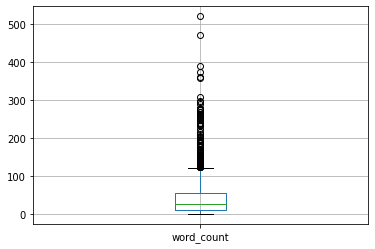

In [ ]:
df_reddit[['word_count']].boxplot()

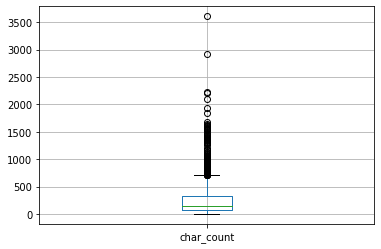

In [ ]:
df_reddit[['char_count']].boxplot()

### **Remove extreme values**  
Remove any comment that has more than 320 words and 2500 characters

In [ ]:
df_reddit = df_reddit[(df_reddit["word_count"] < 320) & (df_reddit["char_count"] < 2500)]
df_reddit.info

<bound method DataFrame.info of            date  ... char_count
0    2020-01-15  ...      195.0
1    2020-01-15  ...      357.0
2    2020-01-15  ...      481.0
3    2020-01-15  ...      309.0
4    2020-01-15  ...      731.0
...         ...  ...        ...
1528 2020-03-08  ...     1031.0
1529 2020-03-08  ...      144.0
1530 2020-03-08  ...      503.0
1531 2020-03-08  ...     1014.0
1532 2020-03-08  ...     1644.0

[1504 rows x 4 columns]>

In [ ]:
# return the selected columns for next steps
df_reddit = df_reddit[['date','comment']]

# Text pre-processing

### Transform to lowercase
Because Python is a case-sensitive language. Thus case distinction would be unnecessary

In [ ]:
df_reddit['comment'] = df_reddit['comment'].str.lower()
# View the df
df_reddit.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,date,comment
0,2020-01-15,it's really just time now. electric are good e...
1,2020-01-15,there's about 5 chargefox chargers at my local...
2,2020-01-15,doesn't exactly present a glowing review reall...
3,2020-01-15,"i've been thinking a ""swap and go"" system woul..."
4,2020-01-15,i was looking forward to good information and ...


### Remove duplicate values

In [ ]:
# Remove duplicate values
duplicate_count = len(df_reddit['comment'])-len(df_reddit['comment'].drop_duplicates())
print('duplicate count:', duplicate_count)
print('total records before remove duplicates:', df_reddit.shape[0])

duplicate count: 70
total records before remove duplicates: 1504


In [ ]:
# drop duplicates (keep the last comment of each of the duplicates)
df_reddit = df_reddit.drop_duplicates(subset='comment', keep="first")
print('updated record count:', df_reddit.shape[0])

updated record count: 1434


### Remove special characters
The given dataset contains some urls and unique characters (@, #) which are not relevant for analysis, thus those words will be removed

In [ ]:
# Import Regular Expression Python module
import re

# Define function
def cleanUpComment(comment):
  # remove any sequence of characters followed by '@' sign
  unique_tweet = re.sub(r"(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)", "", str(comment))
  
  # remove multiple spaces
  spaces_removed = re.sub(r"\s\s+", " ", str(unique_tweet)) 

  return spaces_removed

df_reddit['comment'] = df_reddit['comment'].apply(cleanUpComment)
df_reddit.head(5)

,date,comment
0,2020-01-15,its really just time now electric are good eno...
1,2020-01-15,theres about 5 chargefox chargers at my local ...
2,2020-01-15,doesnt exactly present a glowing review really...
3,2020-01-15,ive been thinking a swap and go system would w...
4,2020-01-15,i was looking forward to good information and ...


### Remove regular expressions
A regular expression is a special sequence of characters that helps to match or find other strings or sets of strings. Does not help the machine learning process.

In [ ]:
df_reddit['comment'] = df_reddit['comment'].str.replace('[^\w\s]','')
df_reddit.head(5)

,date,comment
0,2020-01-15,its really just time now electric are good eno...
1,2020-01-15,theres about 5 chargefox chargers at my local ...
2,2020-01-15,doesnt exactly present a glowing review really...
3,2020-01-15,ive been thinking a swap and go system would w...
4,2020-01-15,i was looking forward to good information and ...


### Remove digits
In this sentiment analysis numbers or digits are not relevant. Therefore, remove any digit in the Tweet

In [ ]:
# define the function
def remove_digits(sent):
  return " ".join(w for w in sent.split() if not w.isdigit())

df_reddit['comment'] = df_reddit['comment'].apply(remove_digits)
df_reddit.head()

,date,comment
0,2020-01-15,its really just time now electric are good eno...
1,2020-01-15,theres about chargefox chargers at my local we...
2,2020-01-15,doesnt exactly present a glowing review really...
3,2020-01-15,ive been thinking a swap and go system would w...
4,2020-01-15,i was looking forward to good information and ...


### Remove Stopwords
Stopwords are irrelevant for NLP purposes because they occur frequently in the language. Therefore, they need to be removed from the dataset.  

In [ ]:
# Load NLTK library
import nltk

# Download the stopwords to the nltk library
nltk.download('stopwords')

# Load the stopwords
from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
# create stop words list
stop = stopwords.words('english')

# Remove not because 'not' is negative impact on sentiment analysis
stop.remove('not')

# Add some words to stop word list
sw_list = ['cant', 'dont', 'doesnt', 'didnt','even', 'get', 'got', 'im','isnt', 'one', 'thats', 'theyre', 'youre', 'theres', 'people', 'would', 'could', 'still', 'many', 'much', 'also', 'every' , 'well', ]
stop.extend(sw_list)

# Print the list of stop words
print(stop)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'only', 'own', 'same', 'so', 'than', 'too', '

In [ ]:
# Remove stop words (from NLTK stop word list) from the Tweets
df_reddit['comment'] = df_reddit['comment'].apply(lambda x: " ".join(x for x in x.split() if x not in stop))
df_reddit.head(3)

,date,comment
0,2020-01-15,really time electric good enough city driving ...
1,2020-01-15,chargefox chargers local westfield read takes ...
2,2020-01-15,exactly present glowing review really almost f...


### Standardization of comment  
**Stemming**  
Remove prefix, suffix etc, to derive the base form of a word

In [ ]:
# import library
from nltk.stem import PorterStemmer

stemmer = PorterStemmer()

# define the function
def stemming_function(sent):
  word_list = sent.split()
  stemmed_word_list = [stemmer.stem(word) for word in word_list]
  stemmed_sentence = " ".join(stemmed_word_list)
  return stemmed_sentence

df_reddit['comment_stemmed'] = df_reddit['comment'].apply(stemming_function)
df_reddit.head()

,date,comment,comment_stemmed
0,2020-01-15,really time electric good enough city driving ...,realli time electr good enough citi drive go r...
1,2020-01-15,chargefox chargers local westfield read takes ...,chargefox charger local westfield read take 15...
2,2020-01-15,exactly present glowing review really almost f...,exactli present glow review realli almost full...
3,2020-01-15,ive thinking swap go system work electric cars...,ive think swap go system work electr car car n...
4,2020-01-15,looking forward good information found not cho...,look forward good inform found not chosen best...


**Lemmatization**  
Converting the given word into it's base form according to the dictionary meaning of the word.

In [ ]:
# Download wordnet
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


True

In [ ]:
# import library
from nltk.stem import WordNetLemmatizer
lemmtizer = WordNetLemmatizer()

# Define the function
def lemmatize_function(sent):
  word_list = sent.split()
  lemma_word_list = [lemmtizer.lemmatize(word) for word in word_list]
  lemma_sentence = " ".join(lemma_word_list)
  return lemma_sentence

df_reddit['comment_lemmatized'] = df_reddit['comment'].apply(lemmatize_function)
df_reddit

,date,comment,comment_stemmed,comment_lemmatized
0,2020-01-15,really time electric good enough city driving ...,realli time electr good enough citi drive go r...,really time electric good enough city driving ...
1,2020-01-15,chargefox chargers local westfield read takes ...,chargefox charger local westfield read take 15...,chargefox charger local westfield read take 15...
2,2020-01-15,exactly present glowing review really almost f...,exactli present glow review realli almost full...,exactly present glowing review really almost f...
3,2020-01-15,ive thinking swap go system work electric cars...,ive think swap go system work electr car car n...,ive thinking swap go system work electric car ...
4,2020-01-15,looking forward good information found not cho...,look forward good inform found not chosen best...,looking forward good information found not cho...
...,...,...,...,...
1528,2020-03-08,see reason remove make lower threshold current...,see reason remov make lower threshold current ...,see reason remove make lower threshold current...
1529,2020-03-08,almostthe cheapest model 70the 70d adds allwhe...,almostth cheapest model 70the 70d add allwheel...,almostthe cheapest model 70the 70d add allwhee...
1530,2020-03-08,fair enough going site see listed know teslas ...,fair enough go site see list know tesla beyond...,fair enough going site see listed know tesla b...
1531,2020-03-08,yeah design section little confusing probably ...,yeah design section littl confus probabl desig...,yeah design section little confusing probably ...


There are a lot of wording issues in Stemming, ex: remov, littl, electr,.. Thought observation, Lemmatization algorithm seems to be working better in this case when compared to the Stemmming algorith.  
**Therefore, we will user Lemmatized data for further analysis**

In [ ]:
#df_reddit['comment'] = df_reddit['comment'].apply(lemmatize_function)
df_reddit = df_reddit[['date','comment']]

### Word frequency analysis

In [ ]:
word_frequency = pd.Series(' '.join(df_reddit['comment']).split()).value_counts()

In [ ]:
# Top common words
word_frequency[:10]  # get top 10

not          395
car          388
electric     337
cars         289
like         228
ev           159
years        152
australia    143
tesla        136
think        133
dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


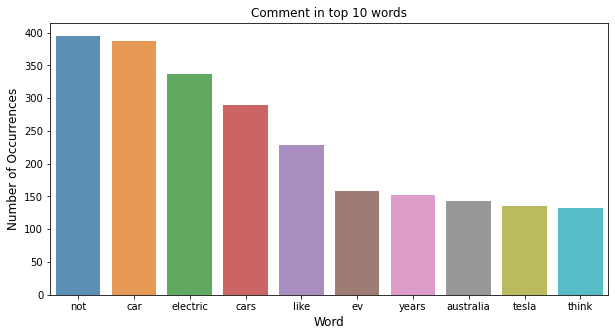

In [ ]:
# import library
import matplotlib.pyplot as plt
import seaborn as sns

# Visualize the top word counts 
word_count  = word_frequency
word_count = word_count[:10,]
plt.figure(figsize=(10,5))
sns.barplot(word_count.index, word_count.values, alpha=0.8)
plt.title('Comment in top 10 words')
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('Word', fontsize=12)
plt.show()

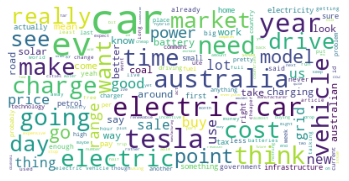

In [ ]:
# import library
from PIL import Image
from wordcloud import WordCloud

# create word cloud
corpus = list(df_reddit['comment'])

wordcloud = WordCloud(background_color='white', max_words=200, max_font_size=50, random_state=42).generate(str(corpus))

fig = plt.figure(1)
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

From the word cloud we could identify that the terms **car, not, electric, ev** has been mentioned frequently. Some of the words are expected - it will not generate much an insight.  
**Therefore, those high frequency non-insightful words will be removed.**

### Remove common words  
Based on the context, those expected and non-insightful words will be removed from the dataset

In [ ]:
# Creating a list of custom stopwords
new_words_to_remove = ["car", 'cars', "electric", "ev",'evs', 'vehicle', 'vehicles', 'australia', 'not', 'like', 'think', 'need', 'going', 'really']

In [ ]:
# Remove common words using lambda function
df_reddit['comment'] = df_reddit['comment'].apply(lambda x: " ".join(x for x in x.split() if x not in new_words_to_remove))
df_reddit.head(5)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,date,comment
0,2020-01-15,time good enough city driving replace fossil f...
1,2020-01-15,chargefox chargers local westfield read takes ...
2,2020-01-15,exactly present glowing review almost full tim...
3,2020-01-15,ive thinking swap go system work battery type ...
4,2020-01-15,looking forward good information found chosen ...


## Re-attempt frequency word list

In [ ]:
# Create a word frequency series. (This is a pandas series)
word_frequency = pd.Series(' '.join(df_reddit['comment']).split()).value_counts()

In [ ]:
# Look at the top 10 words
word_frequency[:10]

years       152
tesla       136
market      126
charging    125
charge      118
time        117
power       109
range       108
coal        100
see          98
dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


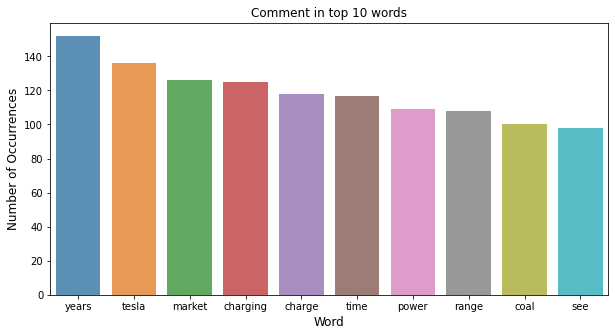

In [ ]:
# Visualize the top word counts 
word_count  = word_frequency
word_count = word_count[:10,]
plt.figure(figsize=(10,5))
sns.barplot(word_count.index, word_count.values, alpha=0.8)
plt.title('Comment in top 10 words')
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('Word', fontsize=12)
plt.show()

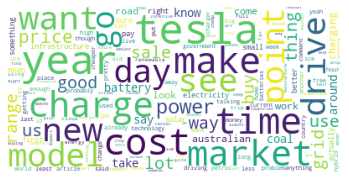

In [ ]:
# Generate word cloud
corpus = list(df_reddit['comment'])

wordcloud = WordCloud(background_color='white', max_words=200, max_font_size=50, random_state=42).generate(str(corpus))

fig = plt.figure(1)
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

# N-grams analysis
An **n-gram** is a contiguous sequence of n items from a given sample of text or speech. They are basically a set of co-occuring words within a given window. When computing the n-grams, the shift is one-step forward (although you can move X words forward in more advanced scenarios)

In [ ]:
# import library for N-grams
from sklearn.feature_extraction.text import CountVectorizer

from nltk.tokenize import word_tokenize
from nltk.util import ngrams
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
# Define function to generate most frequently occuring Bi-grams
def get_ngrams(corpus, ngram_range=(2, 2)):
    
    # Create CountVectorizer object from sklearn library with bigrams
    vec1 = CountVectorizer(ngram_range=ngram_range, max_features=2000).fit(corpus)

    # Create BoW feature representation using word frequency
    bag_of_words = vec1.transform(corpus)

    # compute sum of words
    sum_words = bag_of_words.sum(axis=0) 

    # create (word, frequency) tuples for bigrams
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec1.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq

## **Bigrams**

In [ ]:
bigrams_comment = get_ngrams(df_reddit['comment'].tolist(), ngram_range=(2, 2))

# Convert bigrams of both datasets to a dataframe with column names bi-gram and frequency.
bigrams_comment_df = pd.DataFrame(bigrams_comment)
bigrams_comment_df.columns=["Bi-gram", "Freq"]


In [ ]:
# top 10 
bigrams_comment_df.head(10)

,Bi-gram,Freq
0,charging stations,25
1,climate change,20
2,years ago,17
3,fossil fuel,16
4,renewable energy,16
5,public transport,14
6,fuel efficient,14
7,per year,14
8,solar panels,14
9,luxury tax,13


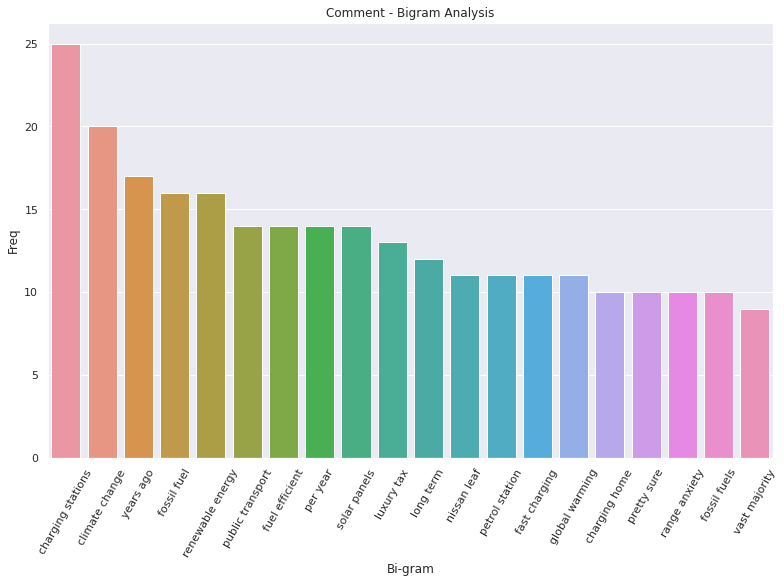

In [ ]:
# Barplot of most freq Bi-grams
top_bigrams_to_show = 20

sns.set(rc={'figure.figsize':(13,8)})
h=sns.barplot(x="Bi-gram", y="Freq", data=bigrams_comment_df[:top_bigrams_to_show])
h.set_xticklabels(h.get_xticklabels(), rotation=60)  # here rotation parameter shows the angle of your x-axis labels
plt.title('Comment - Bigram Analysis')
plt.show()

**insights**

## **Trigrams**

In [ ]:
trigrams_comment = get_ngrams(df_reddit['comment'].tolist(), ngram_range=(3, 3))

# Convert trigrams of both datasets to a dataframe with column names tri-gram and frequency.
trigrams_comment_df = pd.DataFrame(trigrams_comment)
trigrams_comment_df.columns=["Tri-gram", "Freq"]

In [ ]:
# top 10
trigrams_comment_df.head(10)

,Tri-gram,Freq
0,litres per kilometres,6
1,threshold fuel efficient,6
2,long term maintenance,5
3,term maintenance costs,5
4,fossil fuel industry,4
5,solved general use,4
6,lct threshold fuel,4
7,offer pensioners registration,3
8,pensioners registration price,3
9,registration price cut,3


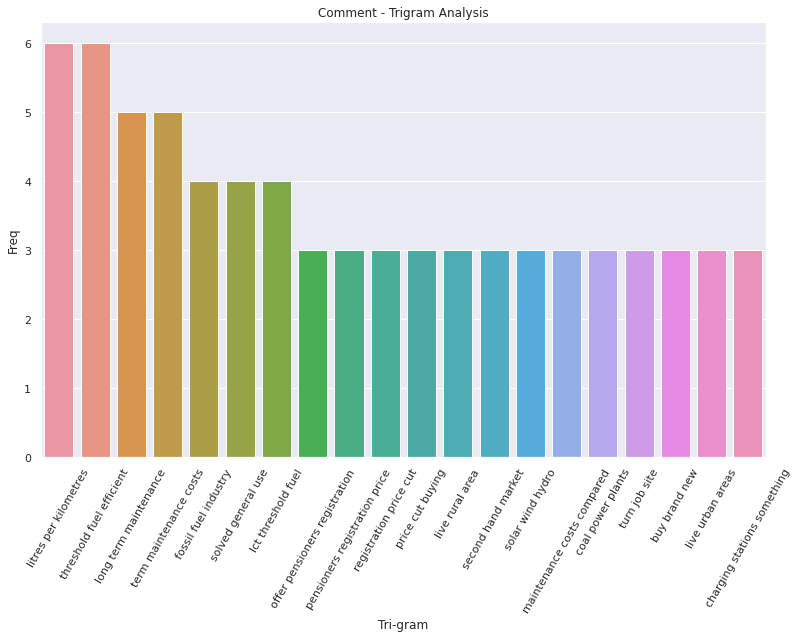

In [ ]:
# Barplot of most freq Tri-grams
top_trigrams_to_show = 20

sns.set(rc={'figure.figsize':(13,8)})
h=sns.barplot(x="Tri-gram", y="Freq", data=trigrams_comment_df[:top_trigrams_to_show])
h.set_xticklabels(h.get_xticklabels(), rotation=60)
plt.title('Comment - Trigram Analysis')
plt.show()

**insight**

# Comment stats


## Post performance

In [ ]:
df_reddit_stats = pd.read_excel("EV_community_discussion_data.xlsx", sheet_name='Reddit')

In [ ]:
len(df_reddit_stats['title'].unique())

27

In [ ]:
# count nbr of comment by title
df_reddit_stats_title_comment_count = df_reddit_stats.groupby('title', as_index = False)[['comment']].count().sort_values(['comment'],ascending=False)
df_reddit_stats_title_comment_count.head(30)

,title,comment
3,Australia 'seven years' behind other nations a...,206
20,Tesla Model 3 electric vehicle smashes sales r...,186
16,Labor says electric cars 'unstoppable' and Coa...,141
8,"Back in November I posted the pic on the left,...",128
14,How far can an Electric Car make it in Australia?,127
11,Electric cars are already causing some grid fa...,116
13,Half of all new cars sold in Australia by 2035...,112
7,Australiaâ€™s paltry electric car uptake will ...,70
23,The reality of electric cars in Australia,58
5,Australia's first manufactured electric car 'n...,57


## Post engagement

In [ ]:
# count nbr of comment by day
df_reddit_stats_day_comment_count = df_reddit_stats.groupby('date', as_index = False)[['comment']].count().sort_values(['comment'],ascending=False)
df_reddit_stats_day_comment_count.head(5)

,date,comment
45,2020-03-06,142
46,2020-03-07,119
44,2020-03-05,91
37,2020-02-26,79
36,2020-02-25,77


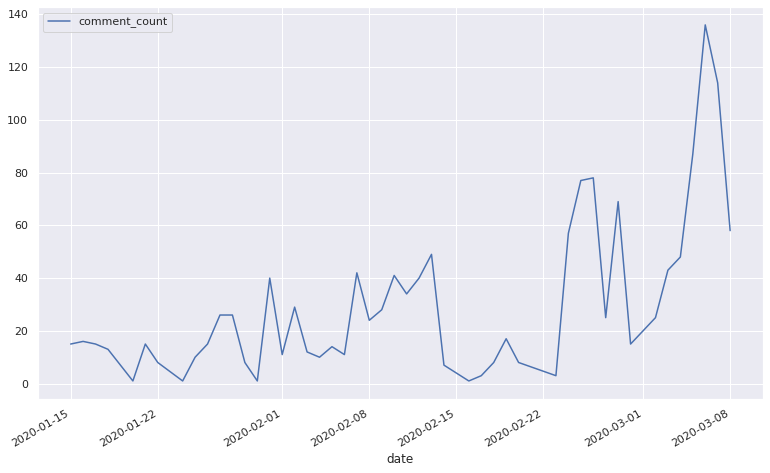

In [ ]:
# visualization
df_reddit_stats_day_comment_count = df_reddit.groupby(['date'])['comment'].count().reset_index(name='comment_count').set_index('date')

ax = df_reddit_stats_day_comment_count.plot()
plt.savefig('temporal_analysis.png', dpi=800)


In [ ]:
# Plot comment sentiment timeline
import plotly.express as px
df_reddit_stats_day_comment_count = df_reddit.groupby(['date'])['comment'].count().reset_index(name='comment_count')

fig = px.line(df_reddit_stats_day_comment_count, x="date", y="comment_count", title='Comment over time on Reddit')
fig.show()

# Sentiment Analysis  

Using Sentiment analysis to determining the attitude or the emotion of the writer, i.e., whether it is positive or negative or neutral.  

*Using Textblob library. The sentiment function of textblob returns the polarity of the sentence, i.e., a float value which lies in the range of [-1,1] where 1 means positive statement and -1 means a negative statement and 0 mean neutral.*

In [ ]:
# import library
from textblob import TextBlob

Derive sentiment of each sentence.

In [ ]:
# Extract sentiments from the comments
df_reddit['sentiment'] = df_reddit['comment'].apply(lambda x: TextBlob(x).sentiment.polarity)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
# View first 20 comments with respective sentiment value
print(df_reddit[['comment', 'sentiment']][:20])

                                              comment  sentiment
0   time good enough city driving replace fossil f...   0.133333
1   chargefox chargers local westfield read takes ...   0.225000
2   exactly present glowing review almost full tim...   0.135714
3   ive thinking swap go system work battery type ...   0.200000
4   looking forward good information found chosen ...   0.261538
5   wow someone homework person wrote proud effort...   0.217857
6   owned nissan leaf us infrastructure better abs...   0.099688
7                                      yeah pull boat   0.000000
8   essentially viable interstaterural drives driv...   0.250000
9   chances government supporting anything envronm...  -0.005208
10  elec soon enough id rather better public trans...   0.137500
11  exactly technology better better excited every...   0.285000
12  progressive governments encourage explosion te...  -0.023377
13  lamp post charging sydney nearly thing seems s...   0.100000
14  read takes 15mins cha

**Categorize of comments**  as Negative, Neutral and Positive.

In [ ]:
# define function negative, nautral, positive analysis
def getTextAnalysis(a):
    if a < 0:
        return "Negative"
    elif a == 0:
        return "Neutral"
    else:
        return "Positive"

In [ ]:
# apply function and create another feature called Score and display the first 20 values.
df_reddit['Score'] = df_reddit['sentiment'].apply(getTextAnalysis)
df_reddit[['comment', 'sentiment', 'Score']].head(20)

,comment,sentiment,Score
0,time good enough city driving replace fossil f...,0.133333,Positive
1,chargefox chargers local westfield read takes ...,0.225000,Positive
2,exactly present glowing review almost full tim...,0.135714,Positive
3,ive thinking swap go system work battery type ...,0.200000,Positive
4,looking forward good information found chosen ...,0.261538,Positive
5,wow someone homework person wrote proud effort...,0.217857,Positive
6,owned nissan leaf us infrastructure better abs...,0.099688,Positive
7,yeah pull boat,0.000000,Neutral
8,essentially viable interstaterural drives driv...,0.250000,Positive
9,chances government supporting anything envronm...,-0.005208,Negative


## Overall sentiment score

Calculate the percentage of positive comments from all the tweets


In [ ]:
positive = df_reddit[df_reddit['Score'] == 'Positive']
print(str(positive.shape[0]/(df_reddit.shape[0])*100) + " % of positive comments")

48.39609483960948 % of positive comments


In [ ]:
negative = df_reddit[df_reddit['Score'] == 'Negative']
print(str(negative.shape[0]/(df_reddit.shape[0])*100) + " % of negative comments")

25.453277545327758 % of negative comments


In [ ]:
neutral = df_reddit[df_reddit['Score'] == 'Neutral']
print(str(neutral.shape[0]/(df_reddit.shape[0])*100) + " % of neutral comments")

26.15062761506276 % of neutral comments


**Representation of Sentiments of Words**

In [ ]:
import matplotlib.pyplot as plt

Text(0, 0.5, 'Count of Sentiment')

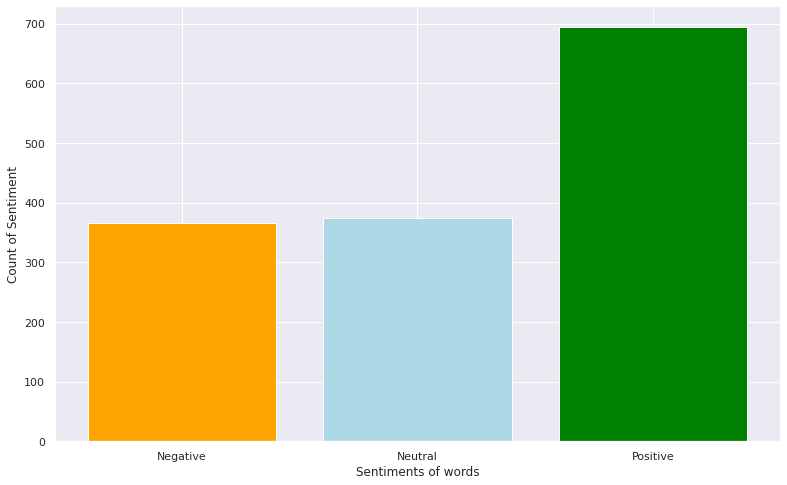

In [ ]:
labels = df_reddit.groupby('Score').count().index.values
values = df_reddit.groupby('Score').size().values
colors = ['orange', 'lightblue', 'green']

plt.bar(labels, values, color = colors)
plt.xlabel("Sentiments of words")
plt.ylabel("Count of Sentiment")

We can see how Negative, Neutral and Positive tweets about climate change since early 2018

## Generate word cloud  
By positive & negative sentiments

**Commonly used positive words**

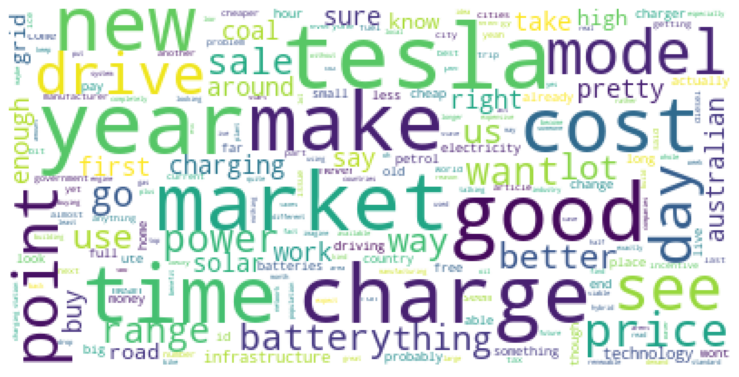

In [ ]:
corpus = list(df_reddit[(df_reddit['Score'] == 'Positive')]['comment'])

wordcloud = WordCloud(background_color='white', max_words=200, max_font_size=50, random_state=42).generate(str(corpus))

fig = plt.figure(1)
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

In [ ]:
word_frequency = pd.Series(' '.join(df_reddit[(df_reddit['Score'] == 'Positive')]['comment']).split()).value_counts()
word_frequency[:10]

years       97
charging    95
charge      92
market      88
good        86
tesla       84
range       77
new         76
power       75
see         71
dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



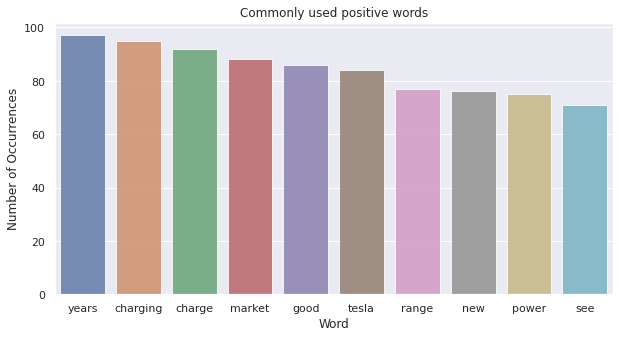

In [ ]:
# Visualize the top common positive word counts 
word_count  = word_frequency
word_count = word_count[:10,]
plt.figure(figsize=(10,5))
sns.barplot(word_count.index, word_count.values, alpha=0.8)
plt.title('Commonly used positive words')
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('Word', fontsize=12)
plt.show()

**Commonly used negative words**

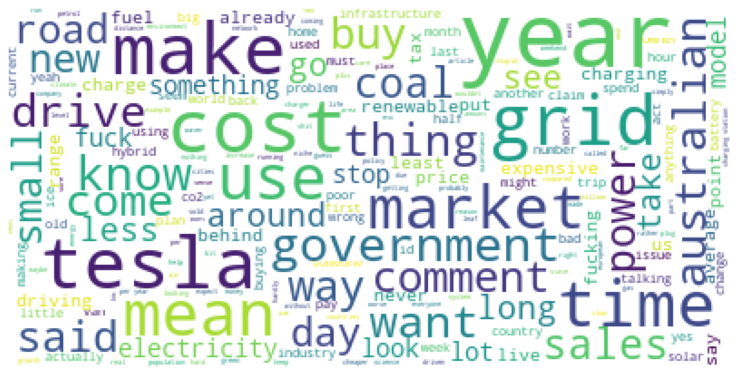

In [ ]:
corpus = list(df_reddit[(df_reddit['Score'] == 'Negative')]['comment'])

wordcloud = WordCloud(background_color='white', max_words=200, max_font_size=50, random_state=42).generate(str(corpus))

fig = plt.figure(1)
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

In [ ]:
word_frequency = pd.Series(' '.join(df_reddit[(df_reddit['Score'] == 'Negative')]['comment']).split()).value_counts()
word_frequency[:10]

years       47
time        35
grid        35
cost        33
tesla       33
year        28
use         27
market      27
coal        26
charging    25
dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



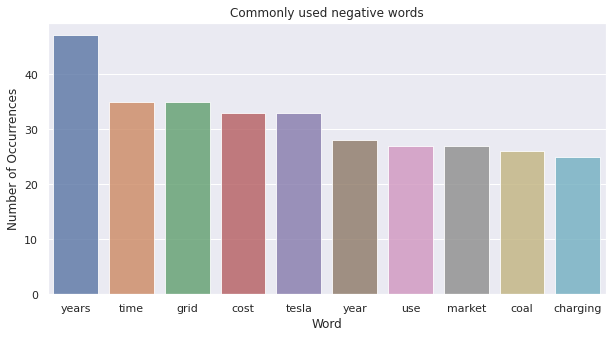

In [ ]:
# Visualize the top common positive word counts 
word_count  = word_frequency
word_count = word_count[:10,]
plt.figure(figsize=(10,5))
sns.barplot(word_count.index, word_count.values, alpha=0.8)
plt.title('Commonly used negative words')
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('Word', fontsize=12)
plt.show()

## Sentiment over time  
Analyse sentiments for each comment, aggregate into the sentiment of particular day and derive a sentiment timeline.


Plot sentiment over time.

In [ ]:
# Plot comment sentiment timeline
# df_senti_reddit_date_wise = df_reddit.groupby(['date'])['sentiment'].mean().reset_index(name='mean_sentiment_comment').set_index('date')
# ax = df_senti_reddit_date_wise.plot()

In [ ]:
df_reddit_avg_senti = df_reddit.groupby(['date'])['sentiment'].mean().reset_index(name='mean_sentiment')

In [ ]:
# Plot comment sentiment timeline
import plotly.express as px

fig = px.line(df_reddit_avg_senti, x="date", y="mean_sentiment", title='Sentiment over time on Reddit')
fig.show()

**let's see the comments and titles from 20 to 23 Feb**

In [ ]:
# comments and titles on 20 to 23 Feb
# df_reddit_stats[(df_reddit_stats['date'] >= '2020-02-20') & (df_reddit_stats['date'] <= '2020-02-23')]
df_reddit_stats[(df_reddit_stats['date'] == '2020-02-17') | (df_reddit_stats['date'] == '2020-02-23')]

,id,comment,title,date
618,R619,Yeah most people will spend an hour stopped on...,Labor says electric cars 'unstoppable' and Coa...,2020-02-17
619,R620,You should 1v1 EV's bro.,Labor says electric cars 'unstoppable' and Coa...,2020-02-17
620,R621,Dad?,Labor says electric cars 'unstoppable' and Coa...,2020-02-17
655,R656,>I did think it really would not be possible b...,Labor says electric cars 'unstoppable' and Coa...,2020-02-23
656,R657,You're assuming i was fucking seruous!,Labor says electric cars 'unstoppable' and Coa...,2020-02-23
657,R658,No-one would care if the tax actually was used...,Labor says electric cars 'unstoppable' and Coa...,2020-02-23


# Topic modeling

In [ ]:
# create new df for modeling
df_processed = df_reddit

In [ ]:
# import libraries
import tempfile
import logging

In [ ]:
# Setting up the environment for LDA algorithm.
temp_df = tempfile.gettempdir()
print('Folder "{}" will be used to save temporary dictionary and corpus.'.format(temp_df))
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.INFO)


Folder "/tmp" will be used to save temporary dictionary and corpus.


In [ ]:
# Convert the tweets as the text corpus.
corpus = list(df_processed['comment'])

In [ ]:
# view first 5 copus
corpus[:5]

['time good enough city driving replace fossil fuel infrastructure drive anywhere economically forced',
 'chargefox chargers local westfield read takes 15mins charge 400km ultra fast chargers find costs charge fastitd bummer rock road trip spot find 3rd queue 2hr charge itll good supply stays bit ahead demand',
 'exactly present glowing review almost full time spent travelling spent charging drive done day day trip requires hotel etcrealistically current point time useful supplement combustion powered replacement years go yet point sooner better lots air pollution issues solve',
 'ive thinking swap go system work battery type battery charged tested swap dropped straight via automated service youd way faster petrol stop know',
 'looking forward good information found chosen best options sadly linking page harm good selecting slow ac chargers fast ones available plugshare handy finding chargers way places poor trip plannerinstead went selected example hyundai kona start end found route a

In [ ]:
# Tokenization
df_texts = [[word for word in str(document).split()] for document in corpus]

In [ ]:
# display first 5 values
df_texts[:5]

[['time',
  'good',
  'enough',
  'city',
  'driving',
  'replace',
  'fossil',
  'fuel',
  'infrastructure',
  'drive',
  'anywhere',
  'economically',
  'forced'],
 ['chargefox',
  'chargers',
  'local',
  'westfield',
  'read',
  'takes',
  '15mins',
  'charge',
  '400km',
  'ultra',
  'fast',
  'chargers',
  'find',
  'costs',
  'charge',
  'fastitd',
  'bummer',
  'rock',
  'road',
  'trip',
  'spot',
  'find',
  '3rd',
  'queue',
  '2hr',
  'charge',
  'itll',
  'good',
  'supply',
  'stays',
  'bit',
  'ahead',
  'demand'],
 ['exactly',
  'present',
  'glowing',
  'review',
  'almost',
  'full',
  'time',
  'spent',
  'travelling',
  'spent',
  'charging',
  'drive',
  'done',
  'day',
  'day',
  'trip',
  'requires',
  'hotel',
  'etcrealistically',
  'current',
  'point',
  'time',
  'useful',
  'supplement',
  'combustion',
  'powered',
  'replacement',
  'years',
  'go',
  'yet',
  'point',
  'sooner',
  'better',
  'lots',
  'air',
  'pollution',
  'issues',
  'solve'],
 ['

In [ ]:
# import libraries
from gensim import corpora, models, similarities
import os

2021-05-02 09:36:46,086 : INFO : 'pattern' package not found; tag filters are not available for English


In [ ]:
# Create a dictionary based on the tokanized words of all the tweets.
dictionary = corpora.Dictionary(df_texts)

# Save the above dictionary as a local file for LDA model to access.
dictionary.save(os.path.join(temp_df, 'df.dict'))

2021-05-02 09:36:46,107 : INFO : adding document #0 to Dictionary(0 unique tokens: [])
2021-05-02 09:36:46,151 : INFO : built Dictionary(7059 unique tokens: ['anywhere', 'city', 'drive', 'driving', 'economically']...) from 1434 documents (total 29178 corpus positions)
2021-05-02 09:36:46,153 : INFO : saving Dictionary object under /tmp/df.dict, separately None
2021-05-02 09:36:46,159 : INFO : saved /tmp/df.dict


In [ ]:
# Print the dictionary
print(dictionary.token2id)

{'anywhere': 0, 'city': 1, 'drive': 2, 'driving': 3, 'economically': 4, 'enough': 5, 'forced': 6, 'fossil': 7, 'fuel': 8, 'good': 9, 'infrastructure': 10, 'replace': 11, 'time': 12, '15mins': 13, '2hr': 14, '3rd': 15, '400km': 16, 'ahead': 17, 'bit': 18, 'bummer': 19, 'charge': 20, 'chargefox': 21, 'chargers': 22, 'costs': 23, 'demand': 24, 'fast': 25, 'fastitd': 26, 'find': 27, 'itll': 28, 'local': 29, 'queue': 30, 'read': 31, 'road': 32, 'rock': 33, 'spot': 34, 'stays': 35, 'supply': 36, 'takes': 37, 'trip': 38, 'ultra': 39, 'westfield': 40, 'air': 41, 'almost': 42, 'better': 43, 'charging': 44, 'combustion': 45, 'current': 46, 'day': 47, 'done': 48, 'etcrealistically': 49, 'exactly': 50, 'full': 51, 'glowing': 52, 'go': 53, 'hotel': 54, 'issues': 55, 'lots': 56, 'point': 57, 'pollution': 58, 'powered': 59, 'present': 60, 'replacement': 61, 'requires': 62, 'review': 63, 'solve': 64, 'sooner': 65, 'spent': 66, 'supplement': 67, 'travelling': 68, 'useful': 69, 'years': 70, 'yet': 71, '

In [ ]:
# Convert the text dictionary to bag of words model
corpus = [dictionary.doc2bow(text) for text in df_texts]

In [ ]:
# convert tweet to tokens and present it as id from the dictionary
comment_id = 0
print(df_texts[comment_id]) # each tweet converted to tokens
print(dictionary.doc2bow(df_texts[comment_id])) # each token is represented as a id from a dictionary

['time', 'good', 'enough', 'city', 'driving', 'replace', 'fossil', 'fuel', 'infrastructure', 'drive', 'anywhere', 'economically', 'forced']
[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (5, 1), (6, 1), (7, 1), (8, 1), (9, 1), (10, 1), (11, 1), (12, 1)]


## Generate the topic model

In [ ]:
# Construct TF-IDF features from the dictionary.
tfidf = models.TfidfModel(corpus)

2021-05-02 09:36:46,260 : INFO : collecting document frequencies
2021-05-02 09:36:46,263 : INFO : PROGRESS: processing document #0
2021-05-02 09:36:46,280 : INFO : calculating IDF weights for 1434 documents and 7058 features (26580 matrix non-zeros)


In [ ]:
# Transform the tweets as TF-IDF feature vectors
corpus_tfidf = tfidf[corpus]

In [ ]:
#Define 20 topics capture through LDA.
total_topics = 20

In [ ]:
#Build the LDA topic model.
lda = models.LdaModel(corpus, id2word=dictionary, num_topics=total_topics)
corpus_lda = lda[corpus_tfidf]

2021-05-02 09:36:46,340 : INFO : using symmetric alpha at 0.05
2021-05-02 09:36:46,341 : INFO : using symmetric eta at 0.05
2021-05-02 09:36:46,354 : INFO : using serial LDA version on this node
2021-05-02 09:36:46,377 : INFO : running online (single-pass) LDA training, 20 topics, 1 passes over the supplied corpus of 1434 documents, updating model once every 1434 documents, evaluating perplexity every 1434 documents, iterating 50x with a convergence threshold of 0.001000
2021-05-02 09:36:46,378 : WARNING : too few updates, training might not converge; consider increasing the number of passes or iterations to improve accuracy
2021-05-02 09:36:47,458 : INFO : -17.667 per-word bound, 208056.8 perplexity estimate based on a held-out corpus of 1434 documents with 29178 words
2021-05-02 09:36:47,460 : INFO : PROGRESS: pass 0, at document #1434/1434
2021-05-02 09:36:48,310 : INFO : topic #16 (0.050): 0.006*"home" + 0.006*"solar" + 0.005*"charge" + 0.005*"charging" + 0.005*"market" + 0.005*"gr

In [ ]:
# Print the Keyword in the 10 topics
lda.show_topics(total_topics, num_words=6)

[(0,
  '0.008*"tesla" + 0.006*"sales" + 0.005*"government" + 0.005*"want" + 0.005*"climate" + 0.004*"change"'),
 (1,
  '0.008*"years" + 0.008*"way" + 0.006*"see" + 0.006*"around" + 0.004*"long" + 0.004*"stations"'),
 (2,
  '0.007*"time" + 0.007*"point" + 0.006*"day" + 0.006*"sure" + 0.005*"coal" + 0.005*"per"'),
 (3,
  '0.007*"charge" + 0.007*"electricity" + 0.005*"coal" + 0.004*"mean" + 0.004*"right" + 0.004*"us"'),
 (4,
  '0.006*"coal" + 0.005*"point" + 0.005*"time" + 0.005*"less" + 0.005*"power" + 0.005*"market"'),
 (5,
  '0.009*"tesla" + 0.007*"years" + 0.006*"new" + 0.005*"range" + 0.004*"charge" + 0.004*"free"'),
 (6,
  '0.007*"market" + 0.006*"go" + 0.005*"charging" + 0.005*"tesla" + 0.004*"power" + 0.004*"better"'),
 (7,
  '0.007*"range" + 0.005*"power" + 0.005*"coal" + 0.005*"cheaper" + 0.004*"lot" + 0.004*"years"'),
 (8,
  '0.005*"cost" + 0.005*"better" + 0.004*"pretty" + 0.004*"sure" + 0.004*"market" + 0.004*"first"'),
 (9,
  '0.007*"charging" + 0.006*"coal" + 0.005*"make" +

**insight**
From the keywords of the topics above we can see the importance of a keyword to the topic.  

**For example**: for the first topic: '0.065*"usa" + 0.035*"greenhousegas" + 0.035*"day" + 0.026*"india" + 0.024*"canada" + 0.022*"ghgt14"'). We can see the importance of the countries (usa, india, canada) and greenhouse gas and day in this topic. The weight of usa in this topic os 0.065. This topic could be the comparison of greenhouse gas emission between three countries over time.  

**The discussion in Australia on global warming and sustainability** has result: '0.093*"melbourne" + 0.084*"sydney" + 0.076*"sustainability" + 0.058*"brisbane" + 0.052*"canberra" + 0.050*"globalwarming"'). In which, state (location) names' weight are 0.093, 0.084, 0.058 and 0.052 for melbourne, sydney, brisbane and canberra.


## Interactive topic analyzer


In [ ]:
!pip install pyLDAvis==2.1.2
import pyLDAvis.gensim

     |████████████████████████████████| 1.6MB 17.3MB/s 
  Created wheel for pyLDAvis: filename=pyLDAvis-2.1.2-py2.py3-none-any.whl size=97712 sha256=d31edce7a2bc7beed163f4d810db68eeb4f243bdc48b0fc33346f66a8a58ee3f
  Stored in directory: /root/.cache/pip/wheels/98/71/24/513a99e58bb6b8465bae4d2d5e9dba8f0bef8179e3051ac414
Successfully built pyLDAvis


2021-05-02 09:36:53,676 : INFO : Generating grammar tables from /usr/lib/python3.7/lib2to3/Grammar.txt
2021-05-02 09:36:53,703 : INFO : Generating grammar tables from /usr/lib/python3.7/lib2to3/PatternGrammar.txt
/usr/local/lib/python3.7/dist-packages/past/types/oldstr.py:5: DeprecationWarning:

Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated since Python 3.3,and in 3.9 it will stop working



In [ ]:
pyLDAvis.enable_notebook()
panel = pyLDAvis.gensim.prepare(lda, corpus_lda, dictionary, mds='tsne')
panel

PreparedData(topic_coordinates=                x           y  topics  cluster       Freq
topic                                                    
3      -10.878068   10.538728       1        1  16.283435
11     -60.884026  -75.591820       2        1  13.042901
17      -2.336119  -53.289074       3        1   7.007508
10     -61.385319  -12.914634       4        1   5.773117
18     -28.737743  126.296997       5        1   5.769951
7        1.066606 -123.552811       6        1   5.062581
9       45.140720   -7.947869       7        1   4.944925
1     -140.795975  -98.530548       8        1   4.687466
19      61.531681  -83.240562       9        1   4.280726
16     -72.563057 -140.396881      10        1   4.136230
2       15.984491   63.578186      11        1   3.702630
15    -160.851624   68.945145      12        1   3.362264
14      85.961830   51.922935      13        1   3.182745
5      -99.020836  109.936348      14        1   2.892006
4     -176.764130   -8.681684      15        1   2.771497
13    -117.189880  -37.420200      16        1   2.731646
12     108.829918  -22.946203      17        1   2.664725
8       47.588097  121.934814      18        1   2.568101
6     -106.467834   30.176889      19        1   2.567812
0      -50.613804   59.328842      20        1   2.567735, topic_info=             Term      Freq     Total Category  logprob  loglift
433         tesla  4.000000  4.000000  Default  30.0000  30.0000
625        market  4.000000  4.000000  Default  29.0000  29.0000
752          grid  2.000000  2.000000  Default  28.0000  28.0000
220         range  3.000000  3.000000  Default  27.0000  27.0000
70          years  5.000000  5.000000  Default  26.0000  26.0000
...           ...       ...       ...      ...      ...      ...
345          look  0.090239  1.527528  Topic20  -5.9539   0.8332
460           see  0.101734  3.737841  Topic20  -5.8340   0.0582
9            good  0.101653  3.755479  Topic20  -5.8348   0.0527
53             go  0.093265  3.238819  Topic20  -5.9210   0.1146
1431  electricity  0.091519  3.359371  Topic20  -5.9398   0.0592

[2552 rows x 6 columns], token_table=      Topic      Freq      Term
term                           
397       1  0.418145  actually
849       2  0.348176    around
73        1  0.377444   battery
20        1  0.383908    charge
20        2  0.191954    charge
...     ...       ...       ...
409       1  0.302674      year
409       2  0.302674      year
70        1  0.174932     years
70        3  0.174932     years
70        8  0.174932     years

[70 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[4, 12, 18, 11, 19, 8, 10, 2, 20, 17, 3, 16, 15, 6, 5, 14, 13, 9, 7, 1])